# <center>  DSCI 521: Project Phase 2 EDA <center>
## <center>  Drexel University <center>
## <center>  Professor Chaomei Chen  <center>
## <center>  Group 4 <center>
## <center>  March 11, 2022  <center>



# Team Introduction 
 
### Chi Nguyen   
Chi Nguyen had an undergraduate degree in Economics and Environmental Studies, with a minor in Psychology. She is a CFA (Chartered Financial Analyst) charter holder, and has been working for over 4.5 years in investment management and risk analytics at two different Investment Offices. She is participating in the graduate program in Data Science at Drexel University.  
 
### Adam Bennion   
Adam Bennion has a BS in Computer Science and 3 years of professional experience as a software engineer. He is currently pursuing an MS in Data Science.
 
### Thomas Pennington   
Thomas Pennington has a BS in Sports and Health Science. He is currently pursuing an MS in Data Science.
 

#   Introduction 
ESG, which stands for ‘Environmental, Social, and Governance,’ has increasingly become a crucial non-financial factor that many investors use to identify material risks and opportunities. Unlike many financial metrics, ESG data is not standardized or mandatory. Data is typically obtained through companies’ reports and news. Many institutions are working together to develop standards to incorporate these factors into the investment process. 
 
Yahoo Finance has been a popular open-source for mutual funds information. Yahoo partners with Morningstar, a market leader in research and investment data, which also owns Sustainalytics, one of the most common ESG data providers. With the partnership, Yahoo Finance provides comprehensive financial (performance and risk) mutual fund data as well as ESG scores by Sustainalytics compared to their peer groups. 
 
Our dataset, obtained from Kaggle, contained mutual funds information from Yahoo Finance as of November 2021. The dataset is in a CSV file.  

  



#   Motivating Questions to Address

As ESG investing becomes increasingly popular, many investors would be interested in the actual correlation between the ESG scores, and the mutual funds’ returns and risks. Institutional investors, such as endowments and foundations, who invest in many different strategies ranging from micro-cap to large-cap, and the U.S. to International Equity, will be intrigued to know the correlations between ESG and financial performance in different strategies. With the availability of free trading, retail investors are participating in the mutual fund inflow and would be interested in knowing if sustainability could drive returns. Consultants and financial advisors could use our analysis to educate their clients on this topic and drive investment recommendations for interested parties.

Therefore, our group wants to address the following questions:

  *   As an investor who wants to support sustainability, how can I invest both sustainably and profitably? 
* What is the probability of beating the average performance given a certain ESG score range?
*  What is the performance of "good" ESG-scored mutual funds vs bad? What about medium score? Specifically E, S, G? 
  *   What are the correlations among various factors:  fund returns, Sharpe Ratio, ESG scores, E, S and G scores? Do funds with low ESG risks (low scores) deliver better performance?
  *  Do mutual funds with a high energy exposure have higher environmental and ESG risks?



#   Design of the Study

To answer the above questions a dataset containing performance and sustainability metrics was required. The ideal performance metric given the available dataset was 5-year return. The dataset lacked sufficient 10-year return data and 3-year return would be more subject to short-term volatility in the market. ESG (Environmental, Social, Governance) scores were perfect metrics for measuring sustainability as a whole and specific aspects of sustainability.

To obtain answers to our questions, finding patterns in the data was necessary. A heatmap (figure 11)  would quickly show positive and negative correlation between variables, which could then be further investigated.

Linear regression was employed, utilizing the performance metric and various sustainability metrics. The scatter plots generated as well as the linear fitting of the data would hopefully highlight positive and negative correlations.

Posterior probability, or more simply the probability of A given B was used in hopes of finding a simplified answer for how
an investor should invest both profitably and sustainably. The idea being that investors could know the chance of their investment performing well given the
sustainability score of the mutual fund.

Energy exposure would be helpful in understanding how environmental score is obtained.
Scatter plots were good candidates for showing the general trend of energy exposure vs environmental score.

#   Datasets

The dataset will be used to better understand the usefulness of the ESG and sustainability score across 15,000+ mutual funds. Ideally a pattern can be found between ESG scores and other important statistics such as performance of a mutual fund. Sustainanalytics created the grading scale in 2018 utilizing risk factors to determine the sustainability of a company or in this case a mutual fund. Utilizing the 298 columns of data from our dataset, we will use packages such as Pandas, Numpy, and Spacy to explore the data and draw connections between the sustainability ratings and performance over short- and long-term mutual funds. We will also utilize Spacy’s NLP functions to see if the mutual funds investment strategies have keywords such as ‘energy’ ‘sustainable,’ and if those with a higher count earned better sustainability ratings and how that compares to the performance of the mutual fund. This analysis will be useful to stakeholders and mutual fund investors.

The column starts with the fund and firm-level including symbol, region, name, category, management, and total assets under management. Then you can find more financial information including moving average, a 52-week high, and low. Fund statistics, such as expense ratio, asset, and sector allocations, Price/Earnings Ratio, and earnings growth are present as well. The columns continue with fund performance in different periods compared to their peer groups and return/risk statistics (beta, Sharpe ratio, alpha, standard deviation, etc.). The columns ended with overall sustainability scores and ranking, E, S, and G scores compared to their peers. Visualization of the data is shared later in this proposal.

Our dataset includes 23,784 unique mutual funds, with 298 columns, both numerical and strings. Not all fields are available for all mutual funds, so we cleaned up the dataset and drop all N/As for our selected fields. Longer return history of over five years is crucial for the analysis because the period since the beginning of COVID (March 2020 – December 2020) was an interesting abnormality. The global market plummeted in March 2020 and rebounded quickly within the next few months, meaning extreme volatility. During that period, many work-from-home-related sectors, including Technology, have benefited from the trend and outperformed the other sectors, such as Energy. 

Our analysis focuses on the following variables:
* ESG scores, 
* E, S and G scores, 
* Fund 5-year returns  
* Fund 5-year's Sharpe Ratio
* MorningStar risk rating
* MorningStar fund rating





  


In [ ]:
import numpy as np
import scipy.stats
import pandas as pd

### Dropping all rows with any empty data, we took a snapshot of the dataset.

In [ ]:
#function for loading csv file into padas dataframe return df, column  data, and shape data
def load_csv_pd_df(file):
    
    data = pd.read_csv(file)
    shape = data.shape
    columns = data.columns
    
    return data, shape, columns
# load specific csv file for analysis
# Note: ensure file path is correct
data, shape, columns = load_csv_pd_df('data/MutualFunds.csv')

# function to get column data from df that we want to analyze
def total_columns(data, list_of_columns):
    
    data = data[list_of_columns]
    
    return data

# input columns from your dataset that you want to compare by column name
columns_to_compare = ['fund_sector_energy','morningstar_risk_rating', 'morningstar_overall_rating', 'morningstar_return_rating', 'esg_score','environment_score','social_score', 'governance_score', 'sustainability_score','fund_return_5years', 'fund_sharpe_ratio_5years']
# create df for visualization
mutual_fund_data = total_columns(data, columns_to_compare)
mutual_fund_data = mutual_fund_data.dropna()

# drop NANs and describe column data from df
data = mutual_fund_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
data.describe()

,fund_sector_energy,morningstar_risk_rating,morningstar_overall_rating,morningstar_return_rating,esg_score,environment_score,social_score,governance_score,sustainability_score,fund_return_5years,fund_sharpe_ratio_5years
count,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000
mean,0.041862,3.054882,3.095815,3.077400,23.764552,3.644943,8.005937,6.172689,23.764552,0.106569,0.824046
std,0.104065,1.099406,1.043383,1.055761,3.036603,2.312173,3.707562,2.823853,3.036603,0.047313,0.276485
min,0.000000,1.000000,1.000000,1.000000,14.230000,0.000000,0.000000,0.000000,14.230000,-0.174800,-1.460000
25%,0.000800,2.000000,2.000000,2.000000,22.050000,2.620000,8.210000,6.160000,22.050000,0.078800,0.640000
50%,0.026500,3.000000,3.000000,3.000000,23.410000,3.910000,9.500000,7.340000,23.410000,0.101100,0.830000
75%,0.043800,4.000000,4.000000,4.000000,25.060000,4.660000,10.210000,7.750000,25.060000,0.130900,1.000000
max,1.000000,5.000000,5.000000,5.000000,41.210000,17.920000,15.080000,11.380000,41.210000,0.398500,1.690000


### We started without any dropped rows and only dropped rows necessary.





#  Methods and Analysis


In [ ]:
# drop NANs from specific columns

mutual_fund_data = mutual_fund_data[mutual_fund_data['esg_score'].notna()]
mutual_fund_data = mutual_fund_data[mutual_fund_data['environment_score'].notna()]
mutual_fund_data = mutual_fund_data[mutual_fund_data['social_score'].notna()]
mutual_fund_data = mutual_fund_data[mutual_fund_data['governance_score'].notna()]
mutual_fund_data = mutual_fund_data[mutual_fund_data['sustainability_score'].notna()]
mutual_fund_data = mutual_fund_data[mutual_fund_data['fund_return_5years'].notna()]
mutual_fund_data = mutual_fund_data[mutual_fund_data['fund_sharpe_ratio_5years'].notna()]
nonzero_mutual_fund_data = mutual_fund_data[mutual_fund_data['environment_score'] != 0]
# convert column data into arrays
esg_scores = nonzero_mutual_fund_data["esg_score"].to_numpy()
e_scores = nonzero_mutual_fund_data["environment_score"].to_numpy()
social_scores = nonzero_mutual_fund_data["social_score"].to_numpy()
g_scores = nonzero_mutual_fund_data["governance_score"].to_numpy()
sustain_scores = nonzero_mutual_fund_data["sustainability_score"].to_numpy()
returns_5yr = nonzero_mutual_fund_data["fund_return_5years"].to_numpy()
fund_sharpe_ratio_5years = nonzero_mutual_fund_data["fund_sharpe_ratio_5years"].to_numpy()
energy_exposure = nonzero_mutual_fund_data["fund_sector_energy"].to_numpy()


nonzero_mutual_fund_data.describe()

,fund_sector_energy,morningstar_risk_rating,morningstar_overall_rating,morningstar_return_rating,esg_score,environment_score,social_score,governance_score,sustainability_score,fund_return_5years,fund_sharpe_ratio_5years
count,9211.000000,9211.000000,9211.000000,9211.000000,9211.000000,9211.000000,9211.000000,9211.000000,9211.000000,9211.000000,9211.000000
mean,0.037500,3.033764,3.106829,3.081859,23.089971,4.340612,9.533940,7.350801,23.089971,0.106137,0.841057
std,0.080232,1.095965,1.031474,1.048979,2.622589,1.829387,1.341782,0.913915,2.622589,0.046733,0.277086
min,0.000000,1.000000,1.000000,1.000000,14.230000,0.340000,2.790000,2.660000,14.230000,-0.116600,-1.460000
25%,0.000800,2.000000,2.000000,2.000000,21.850000,3.490000,9.100000,7.010000,21.850000,0.077300,0.660000
50%,0.027400,3.000000,3.000000,3.000000,23.050000,4.120000,9.710000,7.470000,23.050000,0.099900,0.860000
75%,0.043900,4.000000,4.000000,4.000000,24.100000,4.890000,10.320000,7.840000,24.100000,0.130100,1.010000
max,1.000000,5.000000,5.000000,5.000000,41.210000,17.920000,15.080000,11.380000,41.210000,0.398500,1.690000


In [ ]:
%matplotlib inline

In [ ]:
from matplotlib import pyplot as plt

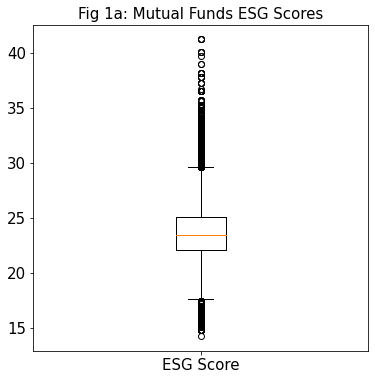

In [ ]:
## Initialize a 6 x 6in figure
fig = plt.figure(figsize = (6, 6))

## Make the box plot
_ = plt.boxplot(
    mutual_fund_data["esg_score"], 
    labels = ["ESG Score"]
)

## adjust the tick and label font size
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Fig 1a: Mutual Funds ESG Scores", fontsize = 15)

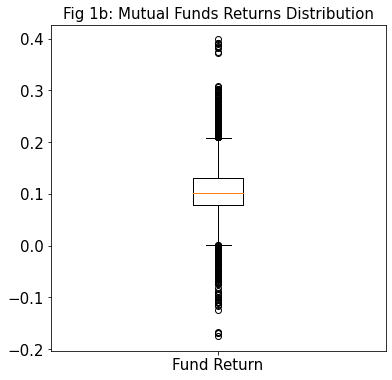

In [ ]:
## Initialize a 6 x 6in figure
fig = plt.figure(figsize = (6, 6))

## Make the box plot
_ = plt.boxplot(
    mutual_fund_data["fund_return_5years"], 
    labels = ["Fund Return"]
)

## adjust the tick and label font size
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Fig 1b: Mutual Funds Returns Distribution", fontsize = 15)

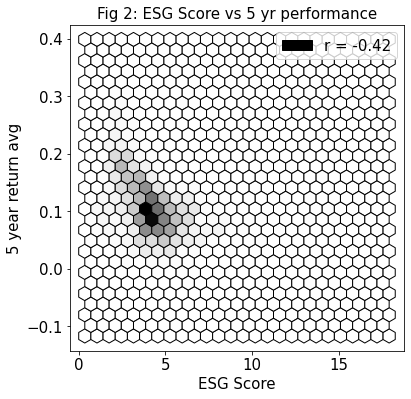

In [ ]:
## set the figure dimensions
hexb_fig = plt.figure(figsize = (6, 6))

## To put a (Pearson) correlation into a figure
## we must process the relationship between the two
## variables and save the output as a string:

cor = scipy.stats.pearsonr(
    e_scores,returns_5yr
)[0]

## for clarity, it's probably best to round
## to a few decimal places, first
## but we should also label it as "r"
corstr = "r = " + str(round(cor, 2))
    
## make a hexbin plot
_  = plt.hexbin(
    e_scores,returns_5yr, color = "black",
    gridsize = 25, cmap = "binary", label = corstr
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Fig 2: ESG Score vs 5 yr performance", fontsize = 15)

## Set the y-label
_ = plt.ylabel("5 year return avg", fontsize = 15)

## Set the y-label
_ = plt.xlabel("ESG Score", fontsize = 15)

## make a legend
_ = plt.legend(fontsize = 15)

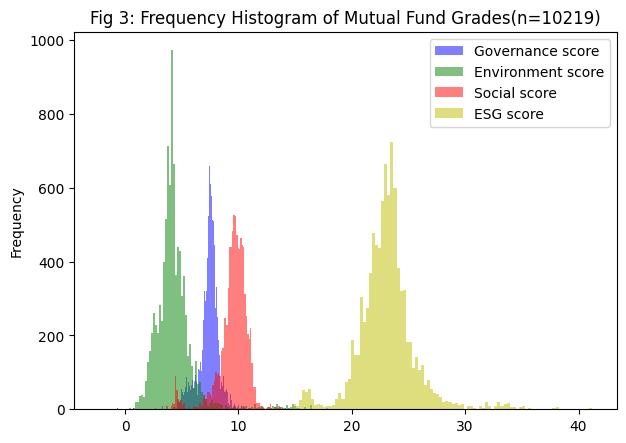

In [ ]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = np.random.normal(size = 50)
plt.hist(x, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

x1 = nonzero_mutual_fund_data['governance_score']
x2 = nonzero_mutual_fund_data['environment_score']
x3 = nonzero_mutual_fund_data['social_score']
x4 = nonzero_mutual_fund_data['esg_score']



kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='b', label='Governance score')
plt.hist(x2, **kwargs, color='g', label='Environment score')
plt.hist(x3, **kwargs, color='r', label='Social score')
plt.hist(x4, **kwargs, color='y', label='ESG score')

plt.gca().set(title='Fig 3: Frequency Histogram of Mutual Fund Grades(n=10219)', ylabel='Frequency')
plt.legend();

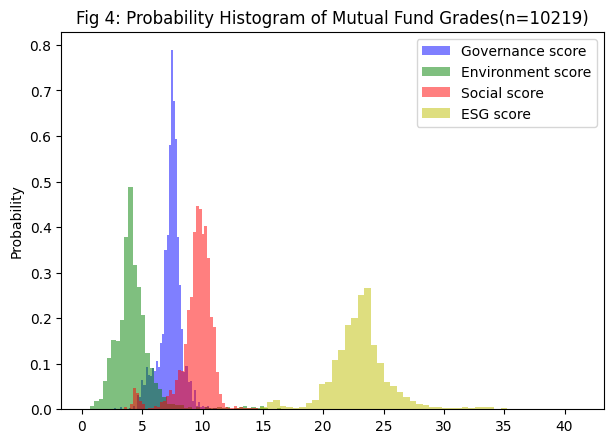

In [ ]:
# Normalize
kwargs = dict(alpha=0.5, bins=50, density=True, stacked=True)

# Plot
plt.hist(x1, **kwargs, color='b', label='Governance score')
plt.hist(x2, **kwargs, color='g', label='Environment score')
plt.hist(x3, **kwargs, color='r', label='Social score')
plt.hist(x4, **kwargs, color='y', label='ESG score')
plt.gca().set(title='Fig 4: Probability Histogram of Mutual Fund Grades(n=10219)', ylabel='Probability')
plt.legend();

(5484, 1) (5484, 1) (5484, 1) (5484, 1)
       esg_score
14536      29.92
12493      20.90
19544      21.64 
        fund_return_5years
14536              0.0365
12493              0.1359
19544              0.2783 

esg_score    23.772608
dtype: float64 
 fund_return_5years    0.106985
dtype: float64
Here's the slope:  [[-0.00368489]]
Here's the intercept:  [0.19458427]
[0.04115686]
ESG Scores vs Energy Exposure Correlation is  0.3960670680159149
Environment Scores vs Energy Exposure Correlation is  0.5819898728479791


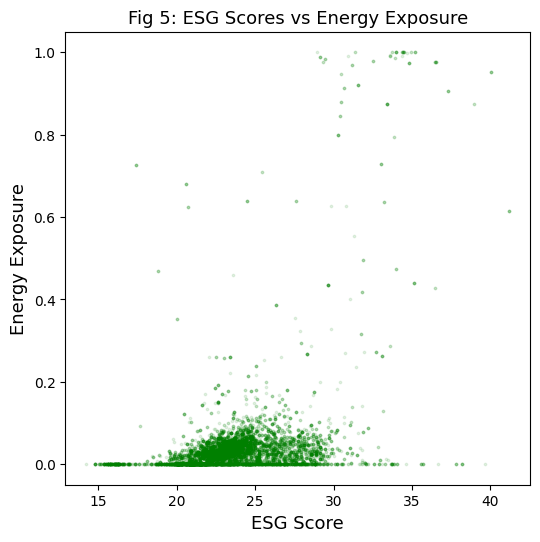

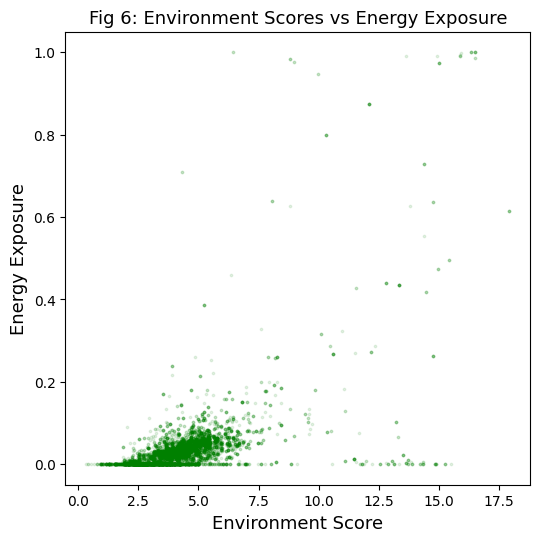

In [ ]:
#Regression: ESG scores to predict returns
from sklearn.model_selection import train_test_split
import numpy as np

esg_train, esg_test, return_train,return_test = train_test_split(
    mutual_fund_data[["esg_score"]], mutual_fund_data[["fund_return_5years"]], 
    test_size=0.5, 
    random_state=42)

print(esg_train.shape, esg_train.shape, return_train.shape, return_train.shape)
print(esg_train.head(3), '\n', return_train.head(3), '\n')
print(np.mean(esg_train), '\n', np.mean(return_train))
#columns_to_compare = ['morningstar_risk_rating', 'morningstar_overall_rating', 'morningstar_return_rating', 'esg_score','environment_score','social_score', 'governance_score', 'sustainability_score','fund_return_5years', 'fund_sharpe_ratio_5years']

from sklearn.linear_model import LinearRegression

# Create linear regression object
lm = LinearRegression()

# Train the model using the training sets
lm.fit(esg_train, return_train)

# Train the model using the training sets
print("Here's the slope: ",lm.coef_)
print("Here's the intercept: ", lm.intercept_)

#Regression with multi variables:
y = data[['fund_return_5years']]
x = data[['environment_score','social_score','governance_score']].values
lm2 = LinearRegression()
# create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
# Train the model using the training sets
lm2.fit(x_train, y_train)
# predict on a separate testing set
predictions = lm2.predict(x_test)
# compute the SSE
SSE = sum((np.array(y_test) - predictions)**2)
# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))
print(RMSE)


#Correlation between ESG scores and energy exposure
import scipy.stats
corr = scipy.stats.pearsonr(mutual_fund_data['esg_score'], mutual_fund_data['fund_sector_energy'])[0]
fig = plt.figure(figsize = (6, 6))
_ = plt.scatter(mutual_fund_data["esg_score"],mutual_fund_data["fund_sector_energy"],
                s = 3, alpha = 0.1, label = "Correlation: " + str(round(corr,2)), color = "green")
_ = plt.title("Fig 5: ESG Scores vs Energy Exposure", fontsize = 13)
_ = plt.xlabel("ESG Score", fontsize = 13)
_ = plt.ylabel("Energy Exposure", fontsize = 13)

#Correlation between E scores and energy exposure
corr2 = scipy.stats.pearsonr(e_scores, energy_exposure)[0]
fig = plt.figure(figsize = (6, 6))
_ = plt.scatter(e_scores,energy_exposure,
                s = 3, alpha = 0.1, label = "Correlation: " + str(round(corr2,2)), color = "green")
_ = plt.title("Fig 6: Environment Scores vs Energy Exposure", fontsize = 13)
_ = plt.xlabel("Environment Score", fontsize = 13)
_ = plt.ylabel("Energy Exposure", fontsize = 13)

print("ESG Scores vs Energy Exposure Correlation is ", corr)
print("Environment Scores vs Energy Exposure Correlation is ", corr2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def linear_regression(column1, column2, xlabel, ylabel, title, plot_color):
    
    X = column1.values.reshape(-1, 1)  # values converts it into a numpy array
    Y = column2.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X_train, y_train)  # perform linear regression
    Y_pred = linear_regressor.predict(X_train)  # make predictions

    print(linear_regressor.score(X_train, y_train))# the higher the R2 value the better the line fits/Max 1
    print(linear_regressor.score(X_test, y_test))
    plt.figure(figsize=(10,10))
    plt.scatter(X, Y,
        color = plot_color, s = 50, alpha = 0.8
    )

        ## Set the title
    _ = plt.title(title + " (n=10219)", fontsize = 15)

    ## Set the y-label
    _ = plt.ylabel(ylabel, fontsize = 15)

    ## Set the y-label
    _ = plt.xlabel(xlabel, fontsize = 15)
    linear_regression = plt.plot(X_train, Y_pred, color='red')

    return linear_regression

def linear_regression_2(column1, column2, xlabel, ylabel, title):
    
    X =  np.array(column1)  # values converts it into a numpy array
    Y =  column2.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X_train, y_train)  # perform linear regression
    Y_pred = linear_regressor.predict(X_train)  # make predictions
    print(title)
    print('Weights:',linear_regressor.coef_)
    print('Bias:',linear_regressor.intercept_)
    print(linear_regressor.score(X_train, y_train))# the higher the R2 value the better the line fits/Max 1
    print(linear_regressor.score(X_test, y_test))
    accuracy = np.array([(yp == Y[i])+0 for i,yp in enumerate(Y_pred)]).mean()
    print('Accuracy:',accuracy)

    return linear_regression

### Below we show the results for the linear regression analysis with a scatter plot with ESG Score on the y-axis and 5-year return rate on the x-axis. The line demostrates the predictable returns given the ESG Score.

0.08025461273784573
0.08522772314573246


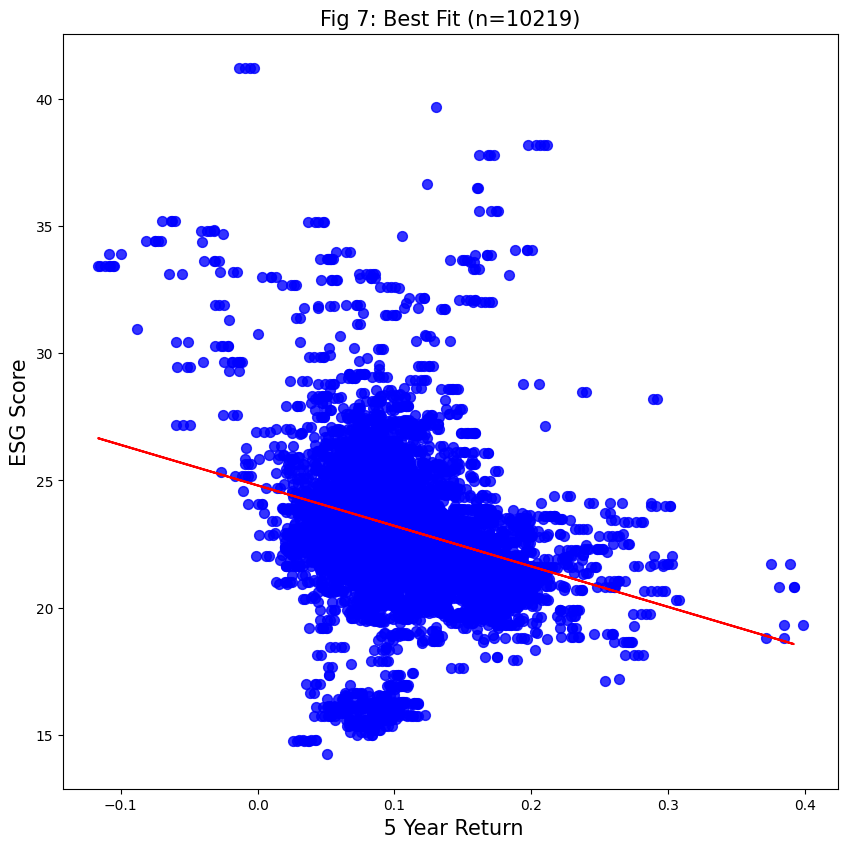

In [ ]:
print(linear_regression(nonzero_mutual_fund_data['fund_return_5years'], nonzero_mutual_fund_data['esg_score'],' 5 Year Return', 'ESG Score', 'Fig 7: Best Fit', 'blue'))

###Below we show the results for the linear regression analysis with a scatter plot with Environmental Score on the y-axis and 5-year return rate on the x-axis. The line demostrates the predictable returns given the Environmental Score.

0.17032095888577892
0.19495705044575495


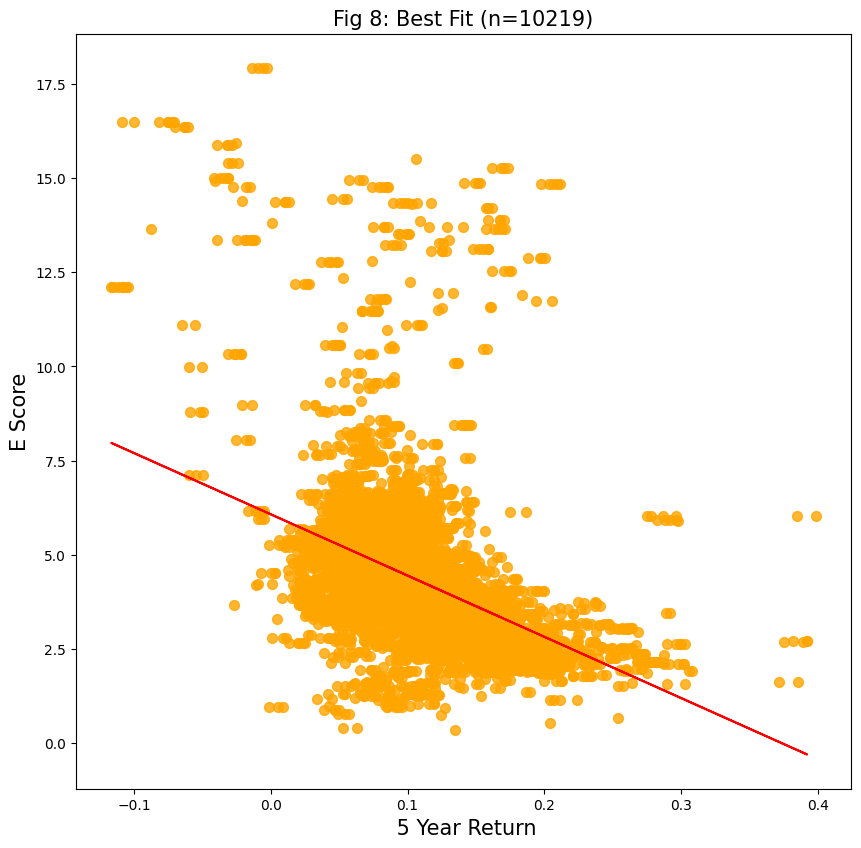

In [ ]:
print(linear_regression(nonzero_mutual_fund_data['fund_return_5years'], nonzero_mutual_fund_data['environment_score'],' 5 Year Return', 'E Score', 'Fig 8: Best Fit', 'orange'))


###Below we show the results for the linear regression analysis with a scatter plot with Social Score on the y-axis and 5-year return rate on the x-axis. The line demostrates the predictable returns given the Social Score.

0.029081192394645017
0.02340986872435058


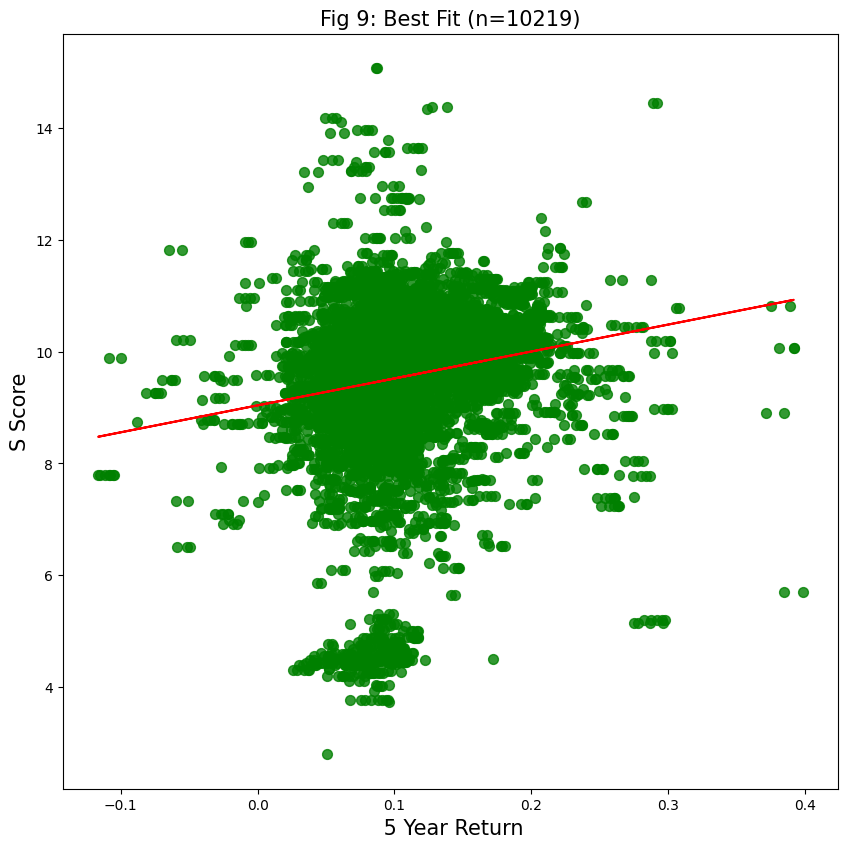

In [ ]:
print(linear_regression(nonzero_mutual_fund_data['fund_return_5years'], nonzero_mutual_fund_data['social_score'],' 5 Year Return', 'S Score', 'Fig 9: Best Fit', 'green'))


###Below we show the results for the linear regression analysis with a scatter plot with Governance Score on the y-axis and 5-year return rate on the x-axis. The line demostrates the predictable returns given the Governance Score.

1.0752395924740199e-05
-0.0018936619289962042


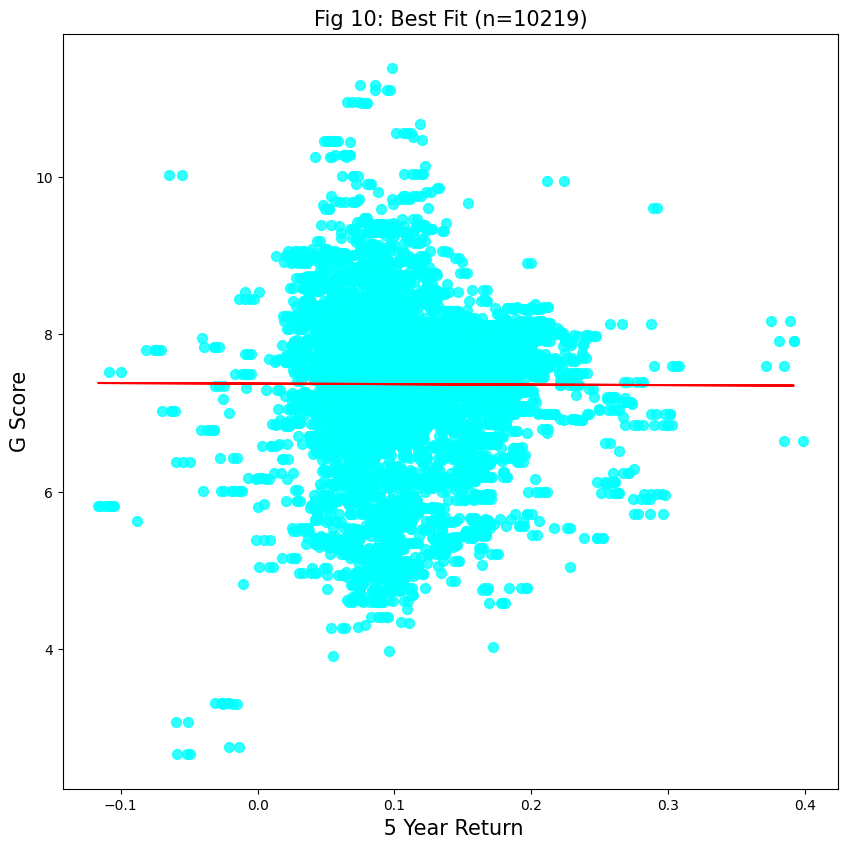

In [ ]:
print(linear_regression(nonzero_mutual_fund_data['fund_return_5years'], nonzero_mutual_fund_data['governance_score'],' 5 Year Return', 'G Score', 'Fig 10: Best Fit', 'cyan'))


In [ ]:
print(linear_regression_2(nonzero_mutual_fund_data[['environment_score','social_score','governance_score']], nonzero_mutual_fund_data['fund_return_5years'],' 5 Year Return', 'ESG Scores', 'ESG Scores vs 5 Year Return'))


ESG Scores vs 5 Year Return
Weights: [[-0.01105171  0.0115089  -0.01360856]]
Bias: [0.14429323]
0.23601133576643996
0.25825720939380936
Accuracy: 0.0
<function linear_regression at 0x7fc07819ca70>


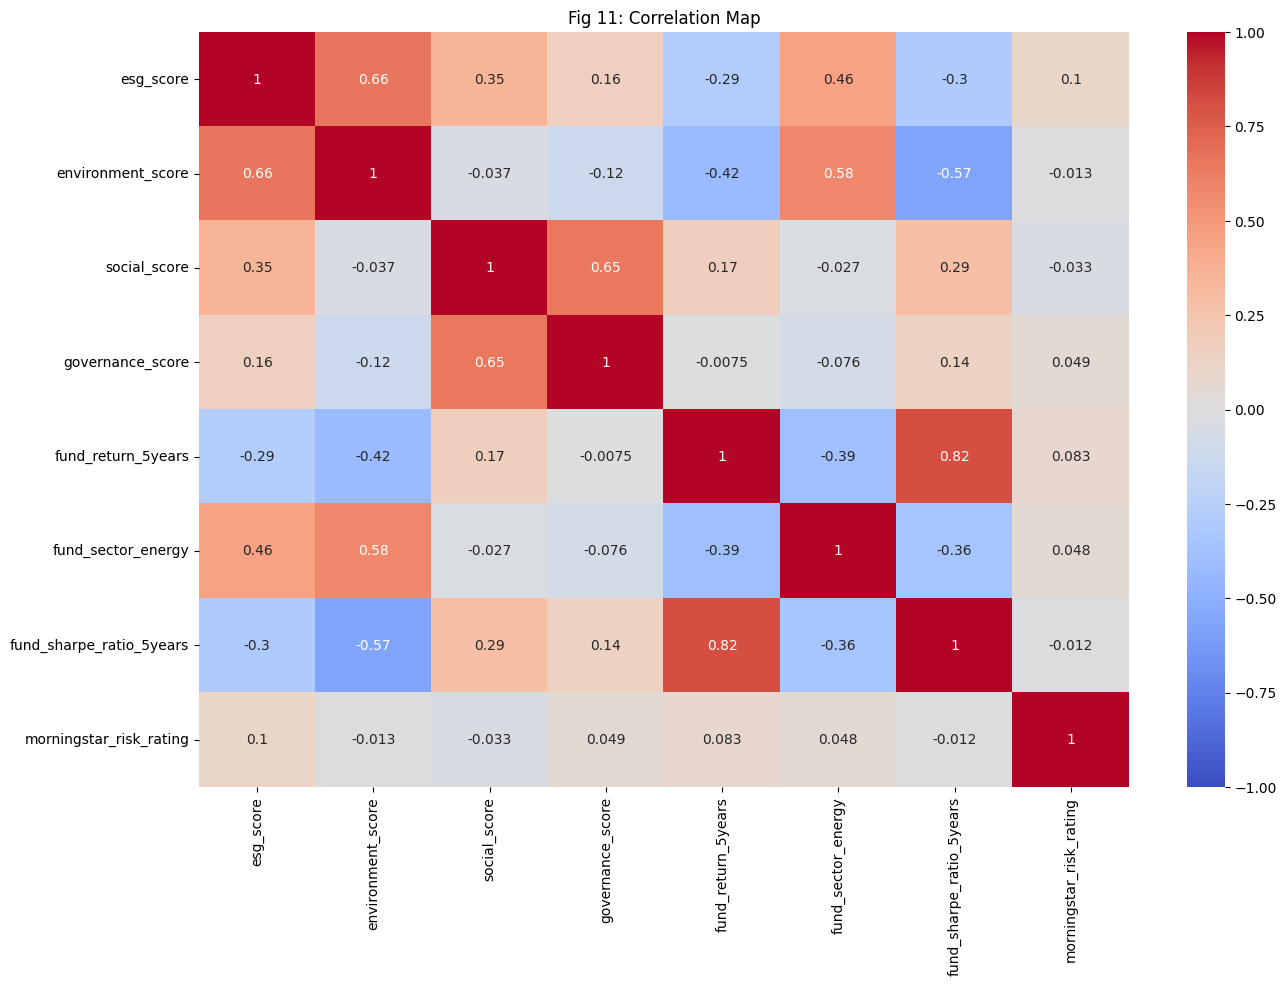

In [ ]:
import seaborn as sns
#cmap = sns.cm.rocket_r
columns = ['esg_score','environment_score','social_score', 'governance_score', 'fund_return_5years', 'fund_sector_energy','fund_sharpe_ratio_5years','morningstar_risk_rating']
data =  nonzero_mutual_fund_data[columns]
plt.figure(figsize=(15,10))
plt.title('Fig 11: Correlation Map')
sns.heatmap(data.corr(),vmin=-1,
cmap='coolwarm',
annot=True)

###Below we find the probability of beating the average performance of mutual funds given investment in a certain ESG score range. Good, medium, bad represent uniform thirds of the score range. Remember, good means low (bottom third of score range), medium is middle 1/3 to 2/3 of the score range, finally bad is the high scores 2/3+.

Mean return: 0.107
Probability of 0.107 +  return given low ESG score:
0.5288195815238848
Probability of 0.107 +  return given medium ESG score:
0.35006098623453563
Probability of 0.107 +  return given high ESG score:
0.23170731707317074


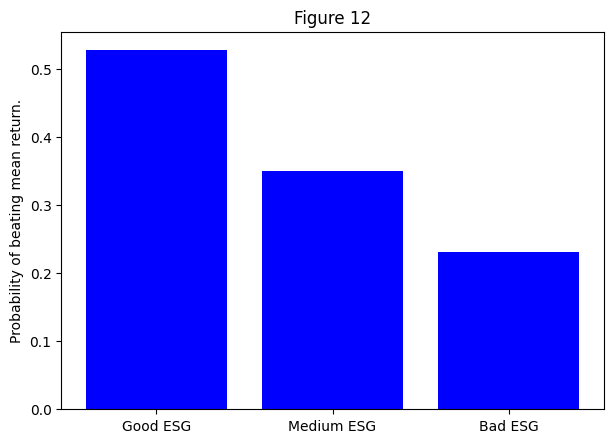

(0.5288195815238848, 0.35006098623453563, 0.23170731707317074)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Y = 5 year return >= mean of all mutual funds in dataset. 1 yes 0 no.


                                    
samples = mutual_fund_data['esg_score']
mean = round(mutual_fund_data['fund_return_5years'].mean(),3)
print('Mean return:',mean)

def PosteriorProbability(samples, ydata, low, med, focus='ESG', title='none', draw_plot = True, print_results = True):
  targets = []
  low_X = []
  med_X = []
  high_X = []
  low_Y = []
  med_Y = []
  high_Y = []
  for r in ydata:
      targets.append((r > mean) + 0)
  for i, x in enumerate(samples):
    if x < low:
      low_X.append(x)
      low_Y.append(targets[i])
    elif x < med:
      med_X.append(x)
      med_Y.append(targets[i])
    else:
      high_X.append(x)
      high_Y.append(targets[i])
  low_prob = np.array([((y == 1) + 0) for y in low_Y]).mean()
  if print_results:
    print('Probability of',mean, '+  return given low',focus,'score:')
    print(low_prob)
  med_prob = np.array([((y == 1) + 0) for y in med_Y]).mean()
  if print_results:
    print('Probability of',mean, '+  return given medium',focus,'score:')
    print(med_prob)
  high_prob = np.array([((y == 1) + 0) for y in high_Y]).mean()
  if print_results:
    print('Probability of',mean, '+  return given high',focus,'score:')
    print(high_prob)
  if draw_plot:
    plt.title(title)
    plt.bar([('Good '+focus), ('Medium '+focus), ('Bad '+focus)],[low_prob, med_prob, high_prob], color='b', label='Chance of beating mean')
    plt.ylabel("Probability of beating mean return.")
    plt.show()
  return low_prob, med_prob, high_prob
PosteriorProbability(samples, mutual_fund_data['fund_return_5years'], samples.min()+(samples.max()-samples.min())/3, samples.min()+(samples.max()-samples.min())/3*2, title='Figure 12')  

You can see an uptrend in probability of good performance the better the ESG score!

Low max threshold: 6.666666666666667
Medium max thresh: 13.333333333333334
Probability of 0.107 +  return given low Environmental score:
0.4234863225363397
Probability of 0.107 +  return given medium Environmental score:
0.17344173441734417
Probability of 0.107 +  return given high Environmental score:
0.29523809523809524


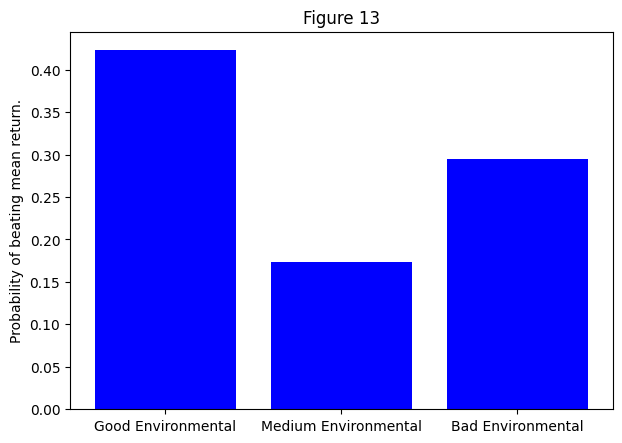

Low max threshold: 6.666666666666667
Medium max thresh: 11.333333333333334
Probability of 0.107 +  return given low Social score:
0.16526610644257703
Probability of 0.107 +  return given medium Social score:
0.4223199814771938
Probability of 0.107 +  return given high Social score:
0.4074074074074074


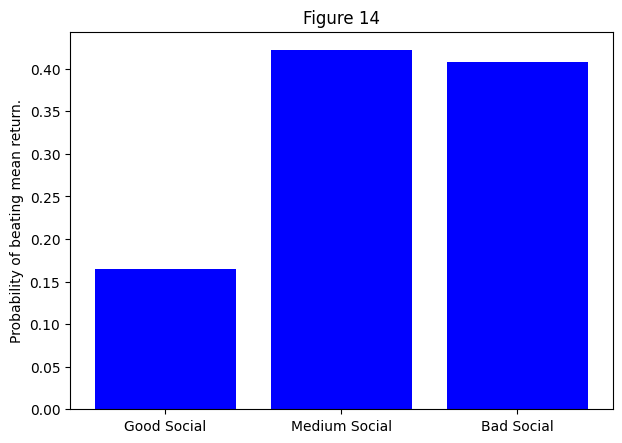

Low max threshold: 5.333333333333334
Medium max thresh: 8.666666666666668
Probability of 0.107 +  return given low Governance score:
0.23140495867768596
Probability of 0.107 +  return given medium Governance score:
0.43080597014925376
Probability of 0.107 +  return given high Governance score:
0.21775898520084566


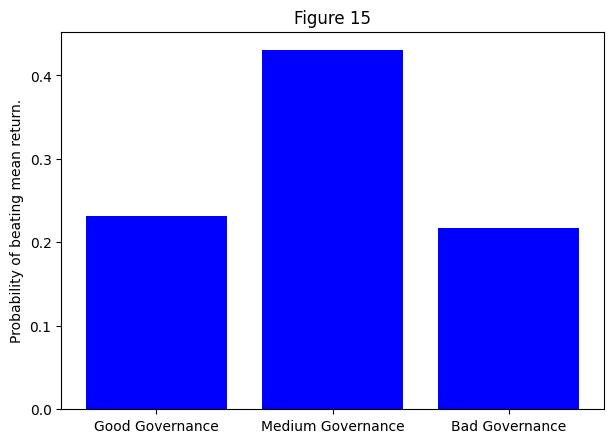

(0.23140495867768596, 0.43080597014925376, 0.21775898520084566)

In [ ]:
samples = np.array(e_scores)
print('Low max threshold:',20/3)
print('Medium max thresh:',20/3*2)
PosteriorProbability(samples, returns_5yr, 20/3, 20/3*2,'Environmental', 'Figure 13')  
samples = np.array(social_scores)
print('Low max threshold:',2+14/3)
print('Medium max thresh:',2+14/3*2)
PosteriorProbability(samples, returns_5yr, 2+14/3, 2+14/3*2,'Social', 'Figure 14') 
samples = np.array(g_scores)
print('Low max threshold:',2+10/3)
print('Medium max thresh:',2+10/3*2)
PosteriorProbability(samples, returns_5yr, 2+10/3, 2+10/3*2,'Governance',  'Figure 15') 

What if the ranges were optimized for maximum difference? This could be acheived with a bias to the range and non-uniform range split. Below, a loop tries Posterior Probability for low,medium,high range of environmental score. The loop goes from 0 to +8 bias and from 2 to 10 range width. The best probability of beating the average performance is recorded for low, medium, and high score ranges along with the corresponding bias and range width.

In [ ]:
best_bias = [0,0,0]
best_range = [0,0,0]
best_prob = [0,0,0]
samples = np.array(e_scores)
for b in range(8):
  for r in range(2,10):
    lp,mp,hp = PosteriorProbability(samples, returns_5yr, b+r, b+r*2,'Environmental', 'Figure 13', draw_plot = False, print_results = False)
    if lp > best_prob[0]:
      best_bias[0] = b
      best_prob[0] = lp
      best_range[0] = r
    if mp > best_prob[1]:
      best_bias[1] = b
      best_prob[1] = mp
      best_range[1] = r
    if hp > best_prob[2]:
      best_bias[2] = b
      best_prob[2] = hp
      best_range[2] = r
for i in range(3):
  print('best bias:',best_bias[i])
  print('best range:',best_range[i])
  print('range result:',best_bias[i]+i*best_range[i],'to',best_bias[i]+(i+1)*best_range[i])
  print('best probability:',best_prob[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


best bias: 0
best range: 3
range result: 0 to 3
best probability: 0.8235699517574087
best bias: 0
best range: 2
range result: 2 to 4
best probability: 0.6345639379347244
best bias: 1
best range: 6
range result: 13 to 19
best probability: 0.35


You have a very good chance of beating the average mutual fund performance if you invest in low (good) Environment score funds! The best range being 0 to 3.

#  Method Summary
Throughout the analysis, we used various methods to address our questions. To show the distributions of data, specifically ESG scores, we utlized box plot (Figure 1) and histograms (Figure 3 and 4). Later on, to show the correlations and relations among our variables, we used hexbin plot (Figure 2) and scatterplots with Pearson correlations (figure 5 and 6), and scatterplots with best fitted lines (Figure 7, 8, 9 and 10). We also showed a heat-map correlation matrix to easily visualize the relationships (-1, the weakest, to 1, the strongest). Last but not least, we used Posterior Probability to calculate the probability of beating the average performance given a certain ESG score. 

#   Results


Figure 1a shows the distriubtion of ESG Scores from Sustainlytics, one of the leading ESG score providers. Figure 1b shows the distribution of 5-year annualized returns among mutual funds. Sustainlytics categorize ESG scores into 5 different categories from lowest to highest risk. Sustainalytics’ ESG Risk Ratings measure a company’s exposure to industry-specific material ESG risks and how well a company is managing those risks. This multi-dimensional way of measuring ESG risk combines the concepts of management and exposure to arrive at an absolute assessment of ESG risk. 

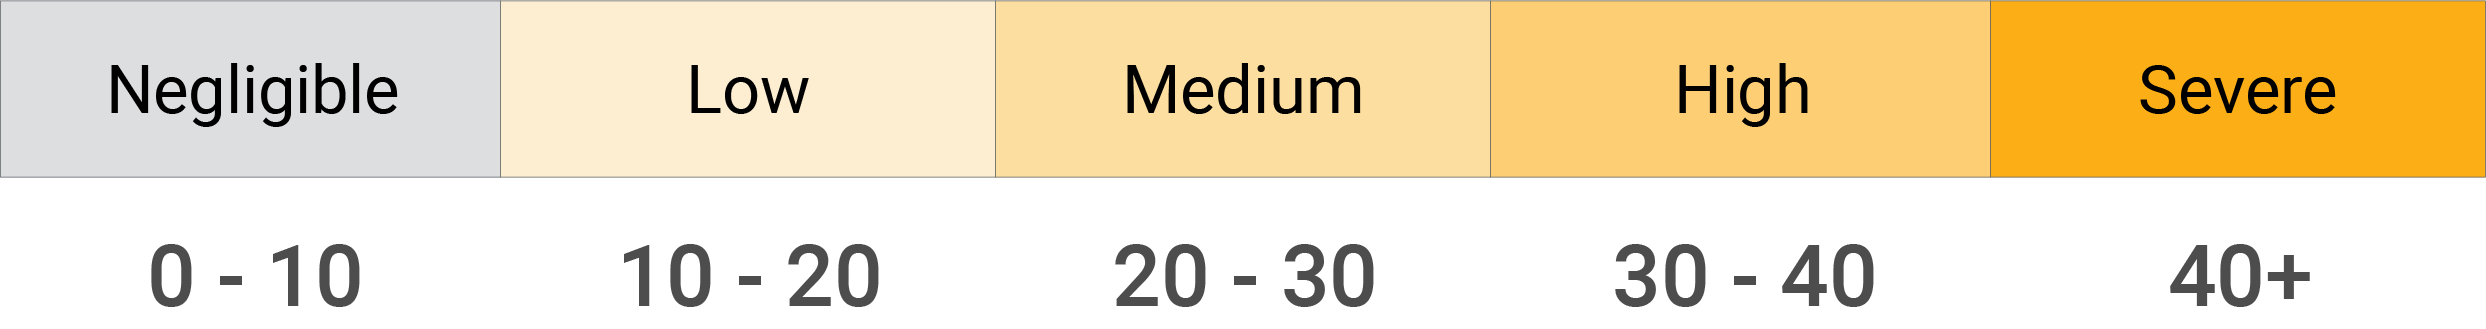

Figure 5 and 6 show the relationship between ESG scores/Environment scores and Energy exposures, or the percentages of mutual funds' investments in Energy stocks. The higher ESG scores or Environment scores mean higher risk, and Energy stocks typically have lower environment scores due to higher carbon emissions than other sectors. Therefore, we expected a positive relationship between ESG/Environment scores and Energy exposure. The scatterplots and Pearson correlations show us medium positive correlations. As investors utilize ESG scores or Environment scores to select mutual fund investments, there could be some implicit biases on their investment diversification (such as an underweight to Energy stocks compared to the market).

Linear regression results show a positive relationship between Environmental Score and ESG, a neatral relationship with Governance scores but a negative relationship with social scores compared to 5-year returns. The relationships indicates that Environment scores show the greatest positive trend when predicting higher 5-year returns. 

The Pearson correlation heatmap shows the correlations between the between all the data. Again Environment scores shows a correlation of -0.42 to 5-year returns. This shows that the lower the environment score (good) the better the reurn.

Posterior probability results show that investing in low (good) ESG score mutual funds corresponds with higher likelihood of good performance (fig. 12). Good performance is defined as beating the average 5-year return of mutual funds. Keep in mind this is for 5 year return leading up to 2021. The lowest third ESG score mutual funds have a 50% chance of beating average performance which is a roughly 10% gain per year over 5 years. Environmental score of less than 3 is gives outstandingly high chance of good performance (~80%). Better social score indicated higher chance of worse performance (fig. 14).

#  Reflections on Strengths and Limitations
### Limitations and Improvements 
The data was last updated as of November 2021. With the current market volatility, it would be ideal to update the most recent data as of year-end (12/31/2021). Some funds only have performance information before August 2021. 
  
### A selection of data for continued analysis 
To overcome the first limitation, we need to get more updated return information if possible. It would be interesting to gather sustainability scores from other ESG data providers besides Sustainalytics since ESG scores are not standardized. Data providers rely on their analysts and algorithms to determine companies' and mutual funds’ scores. The article below from Bloomberg nicely illustrates the differences in ESG ratings among data providers: 
https://www.bloombergquint.com/business/conflicting-esg-ratings-are-confusing-sustainable-investors 
 
To the extent possible, it would be interesting to gather more ESG ratings from other rating agencies to compare with Sustainalytics. 
 
We could continue to use the current dataset but draw from more columns, as there are 100+ columns of data for the thousands of rows of mutual funds.
 
Below is some potential continued analysis: 
* Top investment sector vs ESG score 
* Average highest percentage sector for each Morningstar rating 5,4,3,2,1 
* Morningstar risk rating against ESG score, E, S, G, Sustainability 
* Morningstar return rating vs 10, 5-year returns 
* Remove outliers for all studies (more or less than -3 +3 std deviations) 
* Further study of sharpe ratio in relation to sustainability scores
 
Finally, convert this all into a concise analysis if possible. E.g., “Excluding outliers, Morningstar risk rating and ESG scores had a significant positive correlation, while governance score had a negative relationship with 5-year performance.” 
 
We could further analyze the data, by taking the investment strategy column and utilizing NLP to determine the highest used words and their correlation to the ESG/sustainability score. 
 
### Data distribution  
Our analysis will be completed by further exploration of ESG, sustainability, and Morningstar score metrics with the potential investigation of additional data. A concise briefing of the findings will be generated along with a polished in-depth report of findings with visualizations.  
Our final report (in PDF or similar format) will be published to one or more of the following: 
* Kaggle	 
* Github 
* A blog/articles website 
* Direct distribution to interested parties 



#   Summary
ESG is a way for stakeholders to determine certain risk factors associated with their investments. The linear regression, Pearson correlation, and posterior probability models were used to analyze the performance of 10219 mutual funds that met the criteria for analysis (had ESG scores and 2021 financial data). The analysis determined that out of the ESG ratings, environment had the highest correlation and positive influence on 5-year return data. Environment also produced the highest probability of beating the average 5-year return at 82%. Additionally, the data provided that the Social score had the least impact on fund performance and the least correlation as well. 

Further analysis and data needs to occur to see the impact of ESG ratings on mutual funds, however; stakeholders can rest easy knowing if they focus their investments on mutual funds with low environment scores, they have a high chance of being profitable and environmentally friendly.
